# 1601 QL: Propogation of Uncertainty

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

##Probability, Mean, and Variance

### Discrete Probability:
* $p(x)$ is defined to be the fraction of times a given event occurs out of the total number of trials, in the limit that the total number of trials goes to infinity.

### Continuous Probability:
* $p(x)$ is the probability density, i.e. the probability that an event lies between $x=a$ and $x=b$. This is given as $p(x\in (a,b)) = \int_a^b p(x)dx$.

### Mean $\mu$:
The average or expected value.
$$ \mu = \begin{cases}
  \sum_{i}^{N} p(x_i)x_i \qquad &\text{(Discrete, $N$ samples)}\\
  \\
  \mu = \int p(x) x dx \qquad &\text{(Continuous)}\\
  \end{cases}
$$

In the discrete case, if each event has the same probability of occurance, then $p(x) = \frac{1}{N}$ and we get our familiar mean
$$\mu = \frac{1}{N}\sum_i^N x_i.$$

### Variance, $\sigma^2$: 
Measures the mean deviation from the mean. 
$$ \sigma^2 =
  \begin{cases}
  \sum_i^N p(x_i)(x_i - \mu)^2 \\
  \\
  \int p(x)(x-\mu)^2 dx.
  \end{cases} 
$$
### Standard Deviation, $\sigma$:
The square root of variance. In the context of error analysis, the standard deviation represents a measure of the uncertainty (inverse of precision) of our measurements. For most measurements we specifically are looking at the standard deviation with respect to the sample mean.
$$
\sigma = \sqrt{ \frac{1}{N-1}\sum_i^N (x_i-\mu)^2}
$$


## Gaussian Distribution

A.k.a, Normal or Bell Curve distribution.

\begin{equation}
\mathcal N(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left[-\frac{1}{2\sigma^2}(x-\mu)^2\right]
\end{equation}

Parametrized by
* Mean: $\mu$
* Standard Deviation: $\sigma$


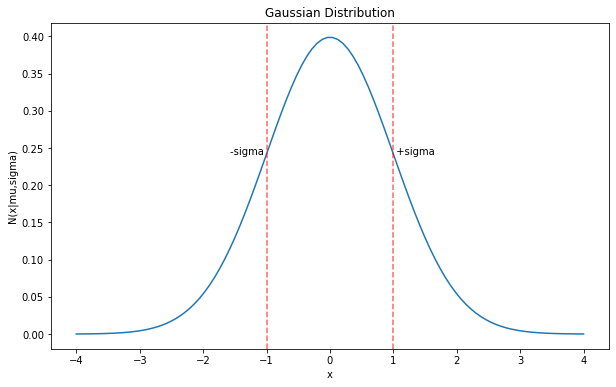

In [0]:
mu = 0
sigma = 1
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = lambda x: stats.norm.pdf(x, mu, sigma)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y(x))
ax.axvline(-sigma, ls='--', color='r', alpha=0.6)
ax.axvline(sigma, ls='--', color='r', alpha=0.6)
ax.text(-sigma, y(-sigma),s="-sigma ", ha='right')
ax.text(sigma, y(sigma),s=" +sigma")
ax.set(xlabel="x", ylabel="N(x|mu,sigma)", title="Gaussian Distribution")
plt.show()

In a Gaussian distribution, 68% of the data lies within one standard deviation.


## Central Limit Theorem in Probability:
* In the limit of a large number of measurements of a *random* variable, the distribution will approach a Gaussian distribution.

Let's test this!

In [0]:
rand_array = np.random.uniform(-10, 10, 10)
rand_array
rand_array.mean()

-1.9193131890996882

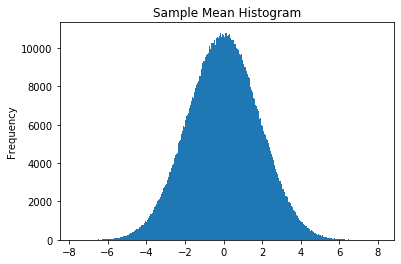

In [0]:

mean_num = 10**6
rand_list = np.array([np.random.uniform(-10, 10, 10).mean() for _ in range(mean_num)])
#print(rand_list)
fig, ax = plt.subplots()
ax.hist(rand_list, bins='auto')
ax.set(ylabel="Frequency", title='Sample Mean Histogram')
plt.show()

* As we take physical measurements, if we assume they only vary due to random error, then it follows that the sample mean should form a Gaussian distribution (in the limit of a large number of samples).

## Canonical Pendulum

Now each student will perform a measurement of the period $\tau$ of the pendulum at a given angle. Naturally, we expect our measurements will vary!

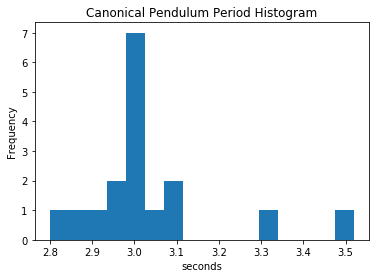

In [0]:
student_values = np.array([3.52, 2.96, 3.01, 3.31, 2.98, 2.85, 3.02, 2.92, 2.97, 3.00, 3.01, 3.03, 3.1, 3.09, 2.8, 3.00,3.00])
fig, ax = plt.subplots()
ax.hist(student_values, bins='auto')
ax.set(xlabel="seconds",ylabel="Frequency",title="Canonical Pendulum Period Histogram")
plt.show()

If we repeated this measurement process many times, then we would expect the sample mean to start resembling a Gaussian distribution.

### Mean and Standard Deviation

In [0]:
mu = student_values.mean()
sigma = student_values.std()
print("mu = {:.4f}, sigma = {:.4f}".format(mu, sigma))


mu = 3.0335, sigma = 0.1607


Now that we have determined the mean and standard deviation, we typically express our measurement  as the value $\mu \pm \sigma$, e.g.

$$ \tau = \langle l \rangle \pm \sigma_l \text{ sec}$$

## Propogation of Uncertainty

Using Newton's laws of motion and some basic circular motion kinematics, we can derive an expression for the length of the pendlum $l$ in terms of $\theta$, period $\tau$, and gravitational acceleration $g$. 

$$ l(\tau, \theta, g) = \frac{\tau^2 g}{(2\pi^2)\cos(\theta)} $$

As a class, we have determined there is some uncertainty within the measurement of $\tau$. How might this uncertainty propogate into the uncertainty of the length of the pedulum?

If there is no cross correlation between variables, then we may calculate the variance of the pendulum length as
$$ \sigma_l^2 = \left(\frac{\partial l}{\partial \tau}\right)^2 \sigma_\tau^2 + \left(\frac{\partial l}{\partial \theta}\right)^2 \sigma_\theta^2 + \left(\frac{\partial l}{\partial g}\right)^2 \sigma_g^2.$$
If $\theta$ and $g$ are independent of $l$, then $\frac{\partial l}{\partial \theta} = \frac{\partial l}{\partial g} = 0$ and we need only evaluate
the derivative
$$ \frac{\partial l}{\partial \tau} = \frac{2\tau g}{(2\pi)^2 \cos\theta}.$$
Thus we finish with a propogation of the uncertainty in $\tau$ into the uncertainty of $l$ as
$$\sigma_l^2 = \frac{\tau^2 g^2}{2\pi^4 \cos^2\theta} \sigma^2_\tau.$$

We see that $\sigma_l$ varies a function of $\tau$, $\theta$, and $g$. 



In [0]:
# Future: <insert graph of l(\tau) with histogram here>